In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [34]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
data_summary=(train_images,train_labels,test_images,test_labels)

In [35]:
def data_summary(x_train,y_train,x_test,y_test):
 print("Train Image Shape",train_images.shape)
 print("Train labels Shape",train_labels.shape)
 print("Test Image Shape",test_images.shape)
 print("Test labels Shape",test_labels.shape)

In [36]:
train_images=(train_images/255)
test_images=(test_images/255)

In [51]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(32,32,3)),
    MaxPool2D((2,2)),
    Conv2D(filters=64,kernel_size=(5,5),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [41]:
model.compile(
optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'],)

In [42]:
history=model.fit(
train_images,
to_categorical(train_labels),
epochs=5,
batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.4140 - accuracy: 0.8817
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1156 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0829 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0673 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0577 - accuracy: 0.9822


In [43]:
los,accurac=model.evaluate(
test_images,
to_categorical(test_labels))

313/313 [==============================] - 4s 11ms/step - loss: 0.0518 - accuracy: 0.9826


In [49]:
predictions=model.predict(test_images[:10])

1/1 [==============================] - 0s 46ms/step


In [50]:
print(np.argmax(predictions,axis=1))
print(test_labels[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [48]:
print(predictions.round())

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


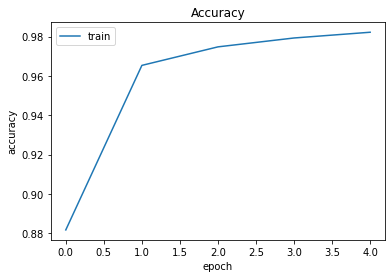

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

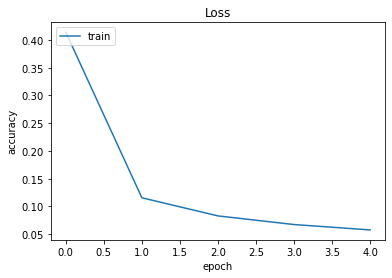

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()